In [1]:
import numpy as np
import pandas as pd

Exploratory Data Analysis

In [2]:
data=pd.read_csv('List of Countries by Sugarcane Production.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [4]:
data.nunique()

Unnamed: 0                    103
Country                       103
Continent                       6
Production (Tons)             103
Production per Person (Kg)    102
Acreage (Hectare)             102
Yield (Kg / Hectare)          102
dtype: int64

In [5]:
data.count()

Unnamed: 0                    103
Country                       103
Continent                     103
Production (Tons)             103
Production per Person (Kg)    103
Acreage (Hectare)             102
Yield (Kg / Hectare)          102
dtype: int64

In [6]:
data['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [7]:
data.isna().any()

Unnamed: 0                    False
Country                       False
Continent                     False
Production (Tons)             False
Production per Person (Kg)    False
Acreage (Hectare)              True
Yield (Kg / Hectare)           True
dtype: bool

In [8]:
data.loc[data.loc[:,'Yield (Kg / Hectare)'].isna(),:]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [9]:
data

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


In [10]:
import re
import numpy as np

In [11]:
data['Acreage (Hectare)'] = data['Acreage (Hectare)'].astype(str)
data['Acreage (Hectare)'] = data['Acreage (Hectare)'].apply(lambda x: re.sub(r'\D', '', x))
data['Acreage (Hectare)'] = data['Acreage (Hectare)'].replace('', np.nan).astype(float)
mean = data['Acreage (Hectare)'].mean()

In [12]:
mean

249898.10784313726

In [13]:
data ['Acreage (Hectare)'].fillna(mean,inplace=True)

In [14]:
data.loc[data.loc[:,'Yield (Kg / Hectare)'].isna(),:]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,249898.107843,NaN


In [15]:
data['Yield (Kg / Hectare)'] = data['Yield (Kg / Hectare)'].str.replace(r'\D', '', regex=True)
data['Yield (Kg / Hectare)'] = data['Yield (Kg / Hectare)'].astype(float)
mean = data['Yield (Kg / Hectare)'].mean()

In [16]:
mean

501850.1960784314

In [17]:
data ['Yield (Kg / Hectare)'].fillna(mean,inplace=True)

In [18]:
data.loc[data.loc[:,'Yield (Kg / Hectare)'].isna(),:]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)


In [19]:
data.tail()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
98,98,Lebanon,Asia,97,16,3.000000,283864.000000
99,99,Djibouti,Africa,53,51,249898.107843,501850.196078
100,100,Singapore,Asia,50,9,2.000000,25.000000
101,101,Samoa,Oceania,12,6,1.000000,119498.000000
102,102,Syria,Asia,1,0,0.000000,830342.000000


In [20]:
data['Production (Tons)'] = data['Production (Tons)'].str.replace('.', '').astype(float)
data['Production per Person (Kg)'] = data['Production per Person (Kg)'].str.replace(',', '').astype(float)

In [21]:
data[data['Country']=='India']

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
1,1,India,Asia,348448000.0,260721.0,4950000.0,703935.0


Production Comparsion

In [22]:
data.sort_values('Production (Tons)',ascending=False).head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382.0,3.668531,10226205.0,751675.0
1,1,India,Asia,348448000.0,260721.000000,4950000.0,703935.0
2,2,China,Asia,123059739.0,88287.000000,1675215.0,734591.0
3,3,Thailand,Asia,87468496.0,1.264303,1336575.0,654422.0
4,4,Pakistan,Asia,65450704.0,324219.000000,1130820.0,57879.0


In [23]:
data.sort_values('Production (Tons)' ,ascending=True).head(6)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
102,102,Syria,Asia,1.0,0.0,0.000000,830342.000000
88,88,Saint Lucia,North America,10.0,55915.0,125.000000,80.000000
101,101,Samoa,Oceania,12.0,6.0,1.000000,119498.000000
100,100,Singapore,Asia,50.0,9.0,2.000000,25.000000
99,99,Djibouti,Africa,53.0,51.0,249898.107843,501850.196078
98,98,Lebanon,Asia,97.0,16.0,3.000000,283864.000000


In [24]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
data.groupby(['Continent']).sum().sort_values(by='Production (Tons)',ascending=False)

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3.498809e+06,1.136924e+07,6.766896e+06
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1.856506e+06,1.060832e+07,1.119731e+07
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3.784457e+06,1.581983e+06,9.581162e+06
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2.324876e+06,1.688987e+06,2.120230e+07
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,2.546413e+04,4.909090e+05,1.624191e+06
Europe,PortugalSpain,5823.0,5.360000e+02,7.100000e+01,1.318709e+06


In [26]:
import matplotlib.pyplot as plt

In [27]:
x=data.sort_values('Production (Tons)',ascending=False).head()['Country']
y=data.sort_values('Production (Tons)',ascending=False).head()['Production (Tons)']

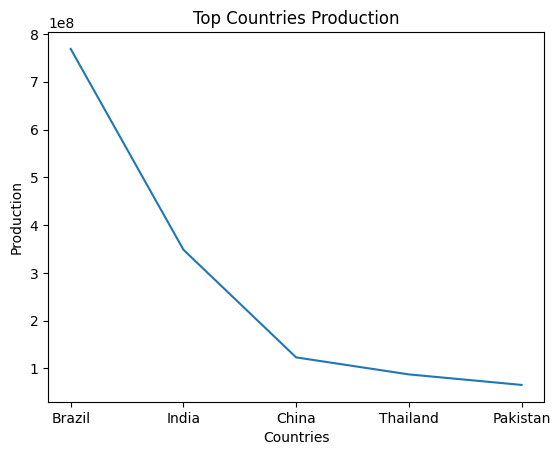

In [28]:
fig, pt=plt.subplots()
pt.plot(x,y)    # plot the data

pt.set_xlabel('Countries')    #customize the plot
pt.set_ylabel('Production')
pt.set_title('Top Countries Production')

plt.show()    #show the plot


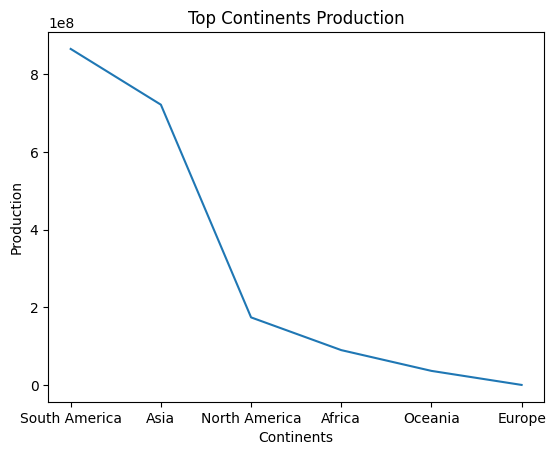

In [29]:
x=data.groupby('Continent').agg({'Production (Tons)':'sum'}).sort_values(by='Production (Tons)',ascending=False).index[0:]
y=data.groupby('Continent').agg({'Production (Tons)':'sum'}).sort_values(by='Production (Tons)',ascending=False)['Production (Tons)'].values
fig, pt = plt.subplots()

pt.plot(x,y)

pt.set_xlabel('Continents')
pt.set_ylabel('Production')
pt.set_title('Top Continents Production')

plt.show()

Production per person analysis

In [30]:
data.columns

Index(['Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

In [31]:
data.sort_values('Production per Person (Kg)',ascending=False).head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
25,Paraguay,South America,6708000.0,951087.0,120.0,559.0
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0
55,Trinidad and Tobago,North America,810.0,597066.0,15.0,54.0
42,Panama,North America,2419638.0,581814.0,37995.0,636831.0
51,Jamaica,North America,1422432.0,521254.0,26255.0,541782.0


In [32]:
data.sort_values('Production per Person (Kg)',ascending=True).head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
102,Syria,Asia,1.0,0.000000,0.0,830342.0
21,El Salvador,North America,7202141.0,1.084111,79103.0,910476.0
24,Nicaragua,North America,6815147.0,1.084393,7413.0,919351.0
3,Thailand,Asia,87468496.0,1.264303,1336575.0,654422.0
7,Australia,Oceania,34403004.0,1.373406,447204.0,769291.0


In [33]:
x=data.sort_values('Production per Person (Kg)',ascending=False).head()['Country']

In [34]:
y=data.sort_values('Production per Person (Kg)',ascending=False).head()['Production per Person (Kg)']

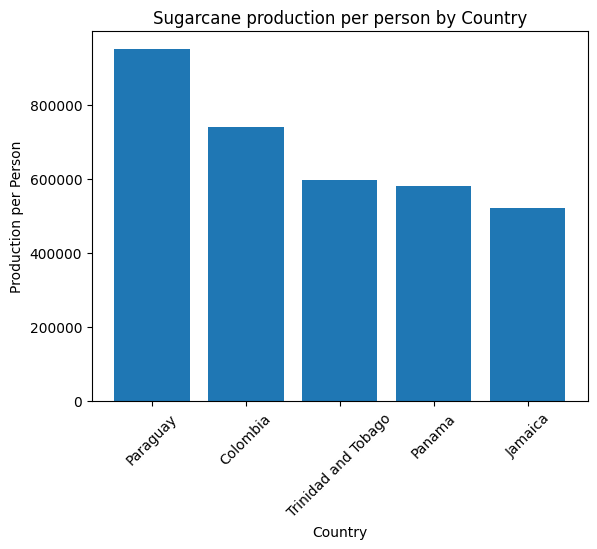

In [35]:
fig, pt =plt.subplots()

pt.bar(x, y)

pt.set_xlabel('Country')
pt.set_ylabel('Production per Person')
pt.set_title('Sugarcane production per person by Country')

plt.xticks(rotation=45)

plt.show()

In [36]:
data.groupby('Continent').agg({'Production per Person (Kg)':'sum'}).sort_values(by='Production per Person (Kg)',ascending=False)

,Production per Person (Kg)
Continent,
North America,3.784457e+06
South America,3.498809e+06
Africa,2.324876e+06
Asia,1.856506e+06
Oceania,2.546413e+04
Europe,5.360000e+02


In [37]:
x=data.groupby('Continent').agg({'Production per Person (Kg)':'sum'}).sort_values(by='Production per Person (Kg)',ascending=False).index[0:]

In [38]:
y=data.groupby('Continent').agg({'Production per Person (Kg)':'sum'}).sort_values(by='Production per Person (Kg)',ascending=False)['Production per Person (Kg)'].values

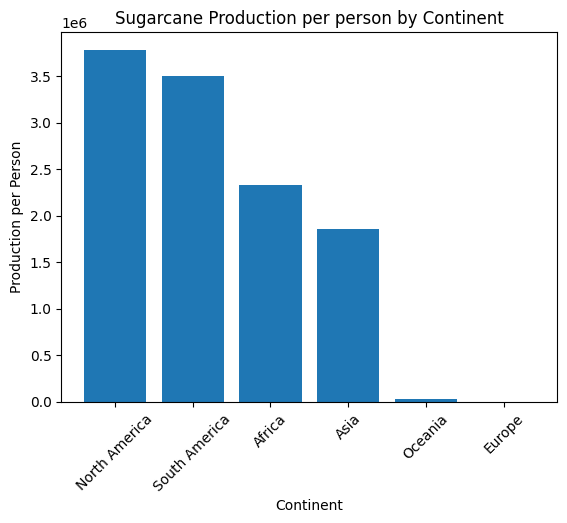

In [39]:
fig, pt = plt.subplots()

pt.bar(x,y)

pt.set_xlabel('Continent')
pt.set_ylabel('Production per Person')
pt.set_title('Sugarcane Production per person by Continent')

plt.xticks(rotation=45)

plt.show()

Acreage analysis

In [40]:
data.columns

Index(['Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

In [41]:
data.sort_values('Acreage (Hectare)',ascending = False).head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3.668531,10226205.0,751675.0
1,India,Asia,348448000.0,260721.000000,4950000.0,703935.0
2,China,Asia,123059739.0,88287.000000,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1.264303,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.000000,1130820.0,57879.0


In [42]:
data.sort_values('Acreage (Hectare)',ascending=True).head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
102,Syria,Asia,1.0,0.0,0.0,830342.0
101,Samoa,Oceania,12.0,6.0,1.0,119498.0
100,Singapore,Asia,50.0,9.0,2.0,25.0
98,Lebanon,Asia,97.0,16.0,3.0,283864.0
97,Spain,Europe,394.0,8.0,9.0,435965.0


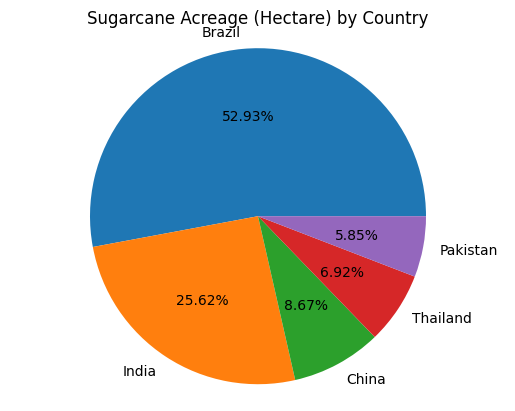

In [43]:
x=data.sort_values('Acreage (Hectare)',ascending=False).head()['Country']
y=data.sort_values('Acreage (Hectare)',ascending=False).head()['Acreage (Hectare)']

fig, pt = plt.subplots()

pt.pie(y, labels=x, autopct='%1.2f%%')

pt.set_title('Sugarcane Acreage (Hectare) by Country')

pt.axis('equal')

plt.show()

In [57]:
data.groupby('Continent').agg({'Acreage (Hectare)':'sum'}).sort_values(by='Acreage (Hectare)',ascending=False)

,Acreage (Hectare)
Continent,
South America,1.136924e+07
Asia,1.060832e+07
Africa,1.688987e+06
North America,1.581983e+06
Oceania,4.909090e+05
Europe,7.100000e+01


In [58]:
x=data.groupby('Continent').agg({'Acreage (Hectare)':'sum'}).sort_values(by='Acreage (Hectare)',ascending=False).index[0:]
y=data.groupby('Continent').agg({'Acreage (Hectare)':'sum'}).sort_values(by='Acreage (Hectare)',ascending=False)['Acreage (Hectare)'].values

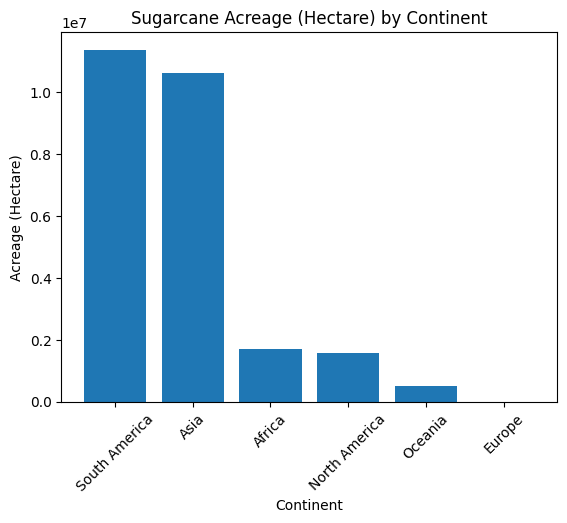

In [60]:
fig, ax = plt.subplots()

ax.bar(x,y)

ax.set_xlabel('Continent')
ax.set_ylabel('Acreage (Hectare)')
ax.set_title('Sugarcane Acreage (Hectare) by Continent')

plt.xticks(rotation=45)

plt.show()